In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.decomposition import PCA
#from sklearn.preprocessing import Imputer
from sklearn.utils import resample
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import r2_score
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from scipy.stats import zscore

scaler = StandardScaler()
import seaborn
import warnings
warnings.filterwarnings('ignore')
import itertools

In [2]:
df = pd.read_csv('concrete (1).csv')

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.shape

(1030, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [7]:

df.apply(lambda x: len(x.unique()))

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

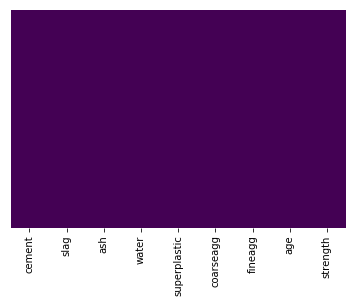

In [8]:
sns.heatmap(df.isnull(),yticklabels = False,cbar=False,cmap='viridis')
#No missing values

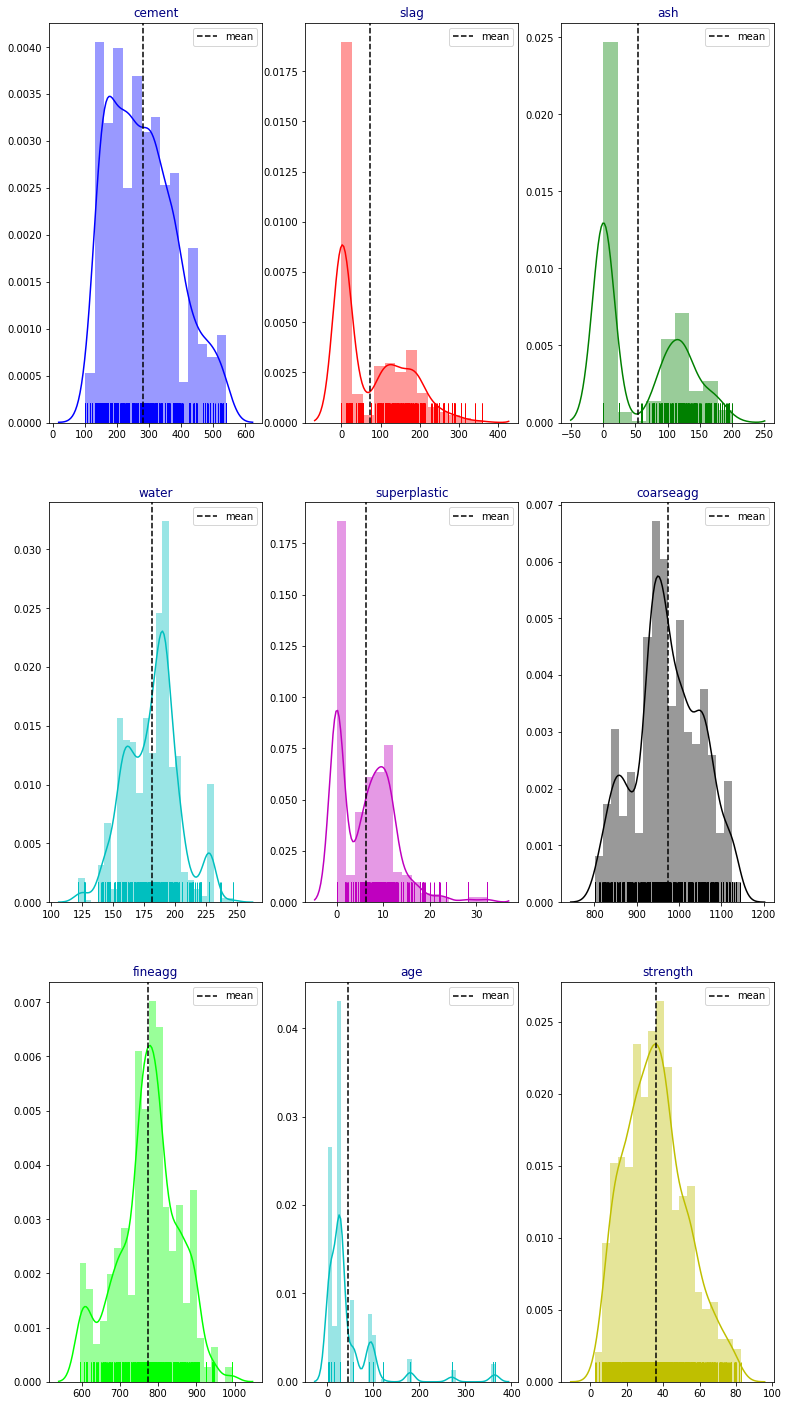

In [9]:
cols = [i for i in df.columns ]
        #if i not in 'strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c","y"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(3,3,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

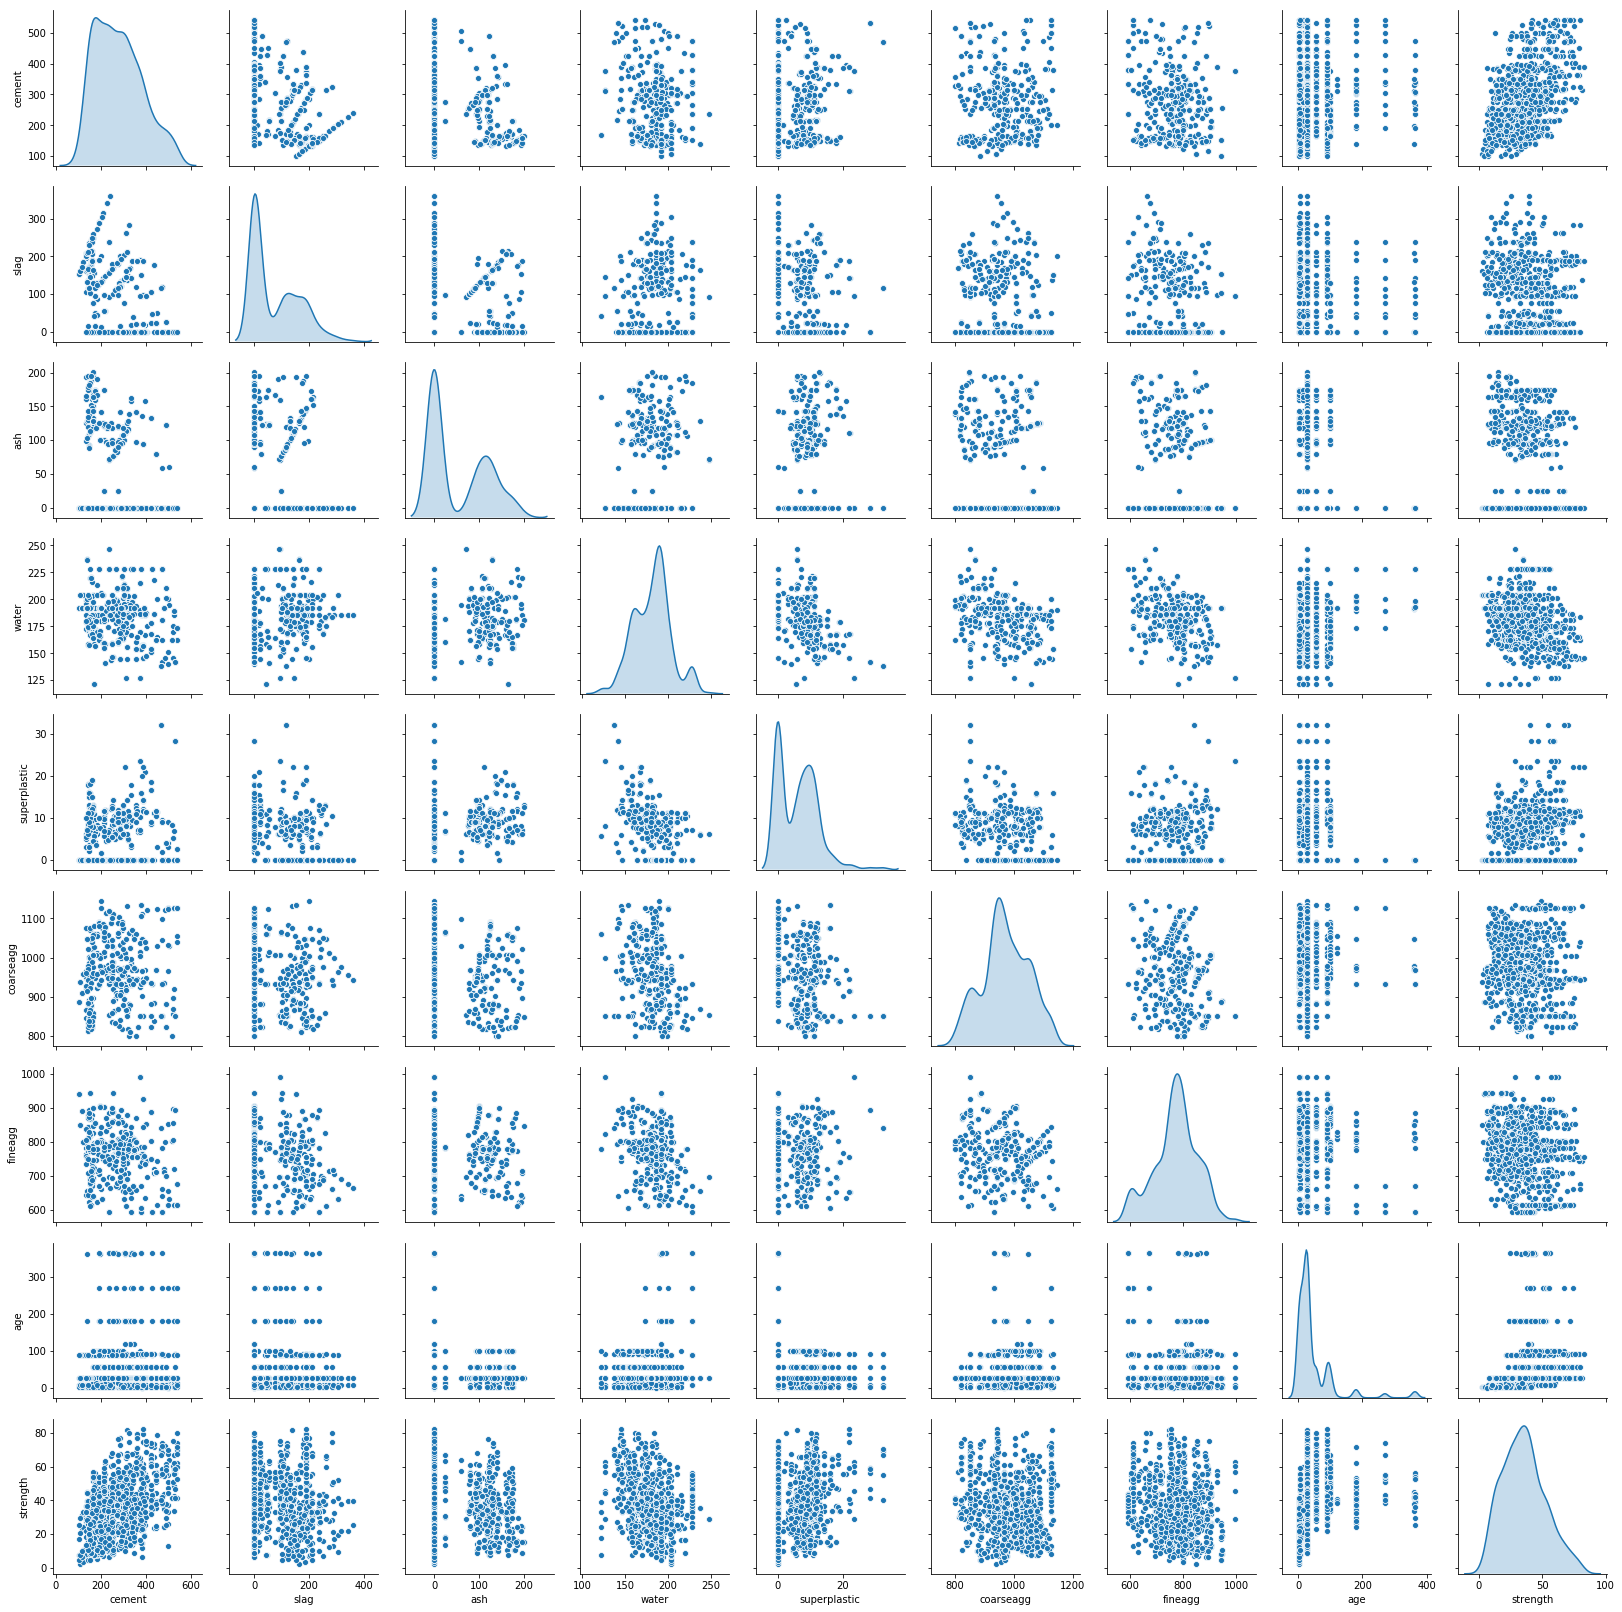

In [10]:
mpg_df_attr = df.iloc[:, 0:9]
#mpg_df_attr['Finalcem'] = mpg_df_attr['cement'] / mpg_df_attr['water']
sns.pairplot(mpg_df_attr, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

In [11]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [12]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
cwo=((df.iloc[:] <(q1-1.5*IQR))|(df.iloc[:]>(q3+1.5*IQR))).sum(axis=0)
opdf=pd.DataFrame(cwo,index=df.columns,columns=['No. of Outliers'])
opdf['Percentage Outliers']=round(opdf['No. of Outliers']*100/len(df),2)
opdf

,No. of Outliers,Percentage Outliers
cement,0,0.00
slag,2,0.19
ash,0,0.00
water,9,0.87
superplastic,10,0.97
coarseagg,0,0.00
fineagg,5,0.49
age,59,5.73
strength,4,0.39


In [13]:
rwo=(((df[:]<(q1-1.5*IQR))|(df[:]>(q3+1.5*IQR))).sum(axis=1))
ro005=(((rwo/len(df.columns))<0.05).sum())*100/len(df)
ro01=(((rwo/len(df.columns))<0.1).sum())*100/len(df)
ro015=(((rwo/len(df.columns))<0.15).sum())*100/len(df)
ro02=(((rwo/len(df.columns))<0.2).sum())*100/len(df)
ro025=(((rwo/len(df.columns))<0.25).sum())*100/len(df)
ro03=(((rwo/len(df.columns))<0.30).sum())*100/len(df)
ro035=(((rwo/len(df.columns))<0.35).sum())*100/len(df)
ro04=(((rwo/len(df.columns))<0.4).sum())*100/len(df)
ro045=(((rwo/len(df.columns))<0.45).sum())*100/len(df)
ro05=(((rwo/len(df.columns))<0.50).sum())*100/len(df)
ro055=(((rwo/len(df.columns))<0.55).sum())*100/len(df)
ro06=(((rwo/len(df.columns))<0.6+0).sum())*100/len(df)
ro=pd.DataFrame(np.round([ro005,ro01,ro015,ro02,ro025,ro03,ro035,ro04,ro045,ro05,ro055,ro06],2),
             index=['5%','10%','15%','20%','25%','30%','35%','40%','45%','50%','55%','60%'],
            columns=['% Data'])
ro.index.name='% Outlier'
ro

,% Data
% Outlier,
5%,91.36
10%,91.36
15%,100.00
20%,100.00
25%,100.00
30%,100.00
35%,100.00
40%,100.00
45%,100.00


In [14]:
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer


In [15]:
#from sklearn.preprocessing import Imputer

In [16]:
#imp = Imputer()
#imp.fit(df)
#df=pd.DataFrame(imp.transform(df),columns=df.columns)

In [17]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [18]:
g=df.groupby('age')
g1=g.get_group(1)
g3=g.get_group(3)
g7=g.get_group(7)
g14=g.get_group(14)
g28=g.get_group(28)
pd.DataFrame(round(g28.iloc[:,-1].sort_values()).unique(),columns=['Comp Strength @ 28 days'])

,Comp Strength @ 28 days
0,9.0
1,10.0
2,11.0
3,12.0
4,13.0
5,15.0
6,16.0
7,17.0
8,18.0
9,19.0


In [19]:
cp = df.corr()
cp

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [21]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [22]:

#Creating copy of original dataset
concrete_df=df.copy()

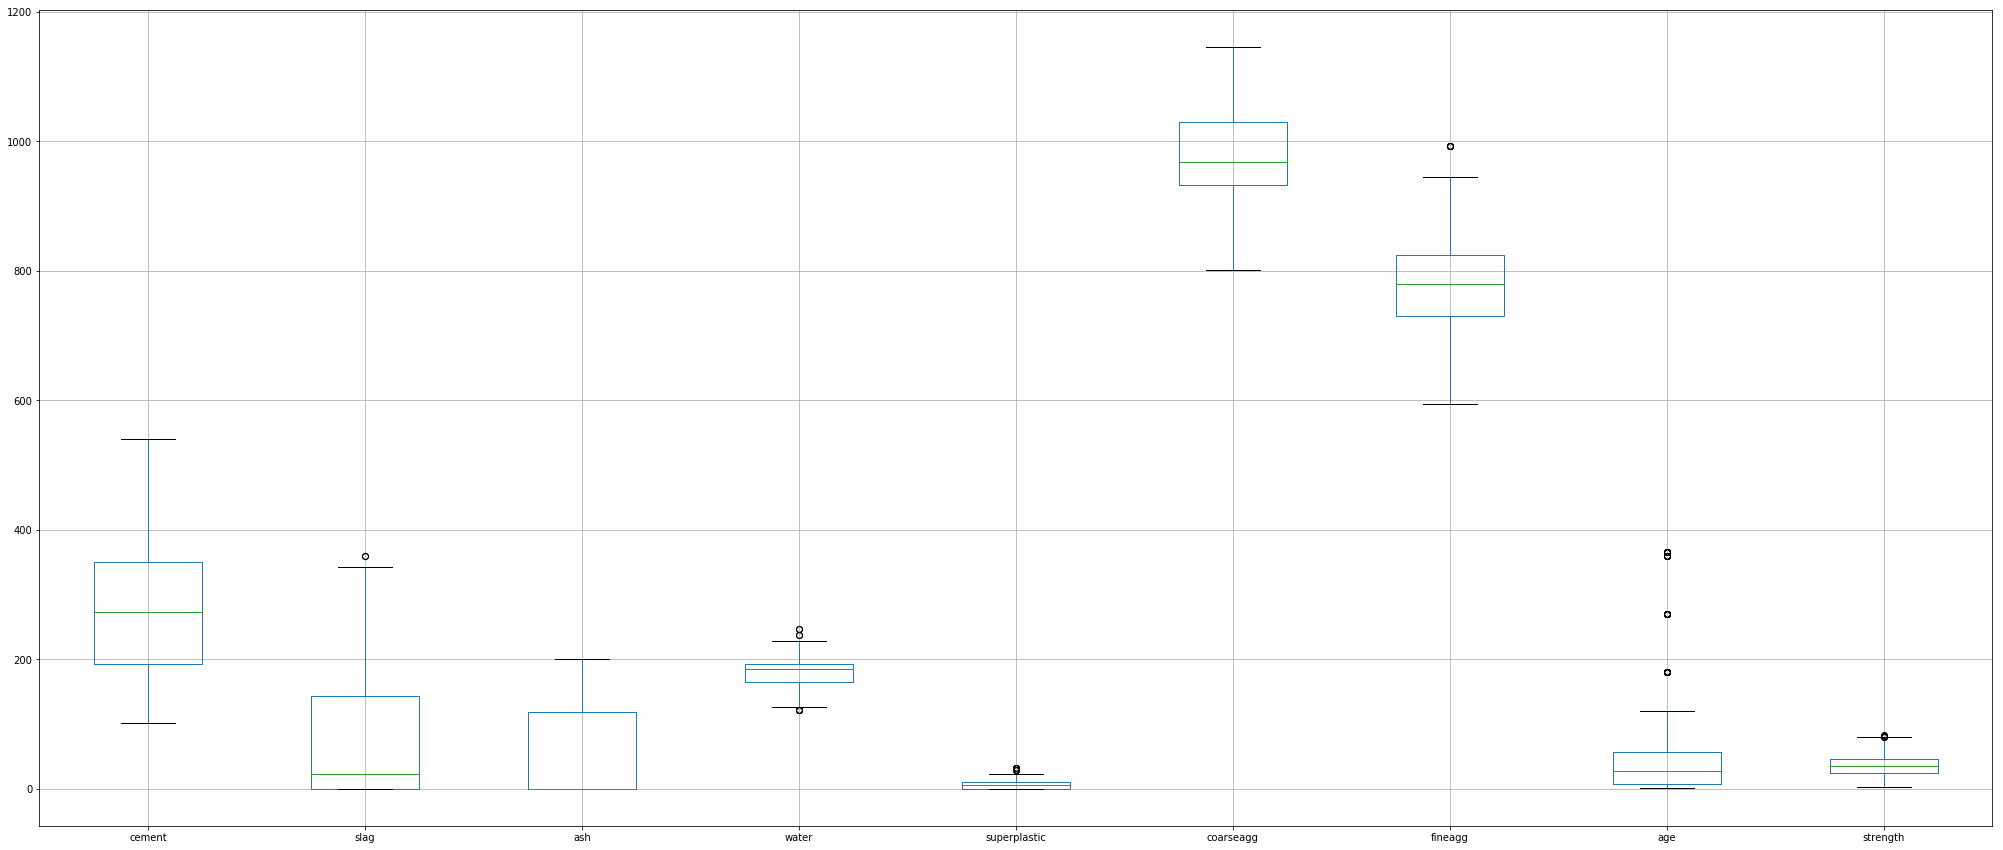

In [23]:

# again check for outliers in dataset after handling missing values using boxplot
concrete_df.boxplot(figsize=(35,15))

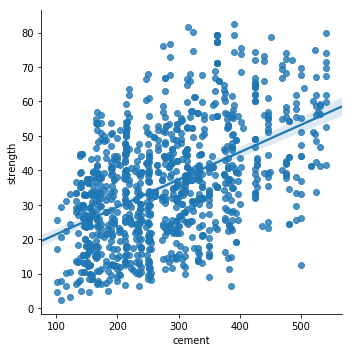

In [24]:
# cement vs target variable strength
sns.lmplot(x="cement",y="strength",data=df)

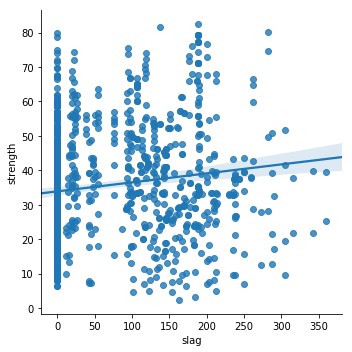

In [25]:
# slag vs target variable strength
sns.lmplot(x="slag",y="strength",data=df)

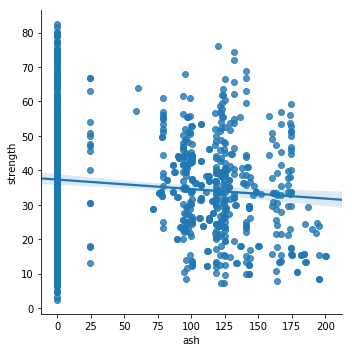

In [26]:
# ash vs target variable strength
sns.lmplot(x="ash",y="strength",data=df)


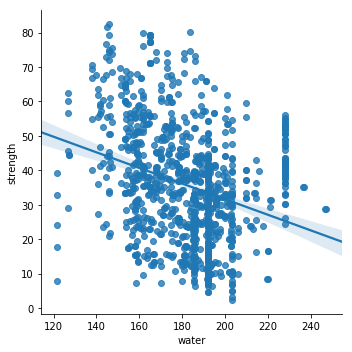

In [27]:
# water vs target variable strength
sns.lmplot(x="water",y="strength",data=df)

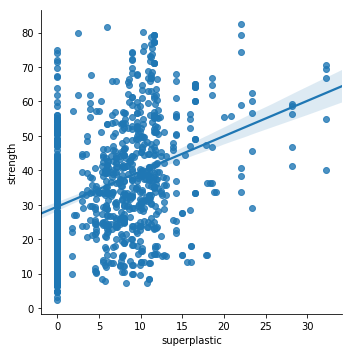

In [28]:
# superplastic vs target variable strength
sns.lmplot(x="superplastic",y="strength",data=df)

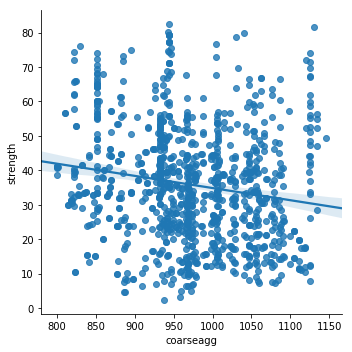

In [29]:
# coarseagg vs target variable strength
sns.lmplot(x="coarseagg",y="strength",data=df)

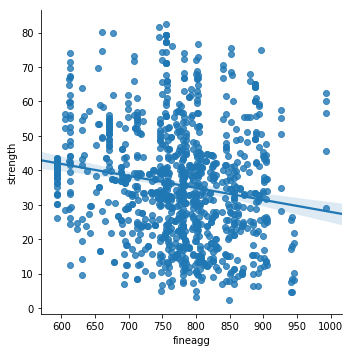

In [30]:
# fineagg vs target variable strength
sns.lmplot(x="fineagg",y="strength",data=df)

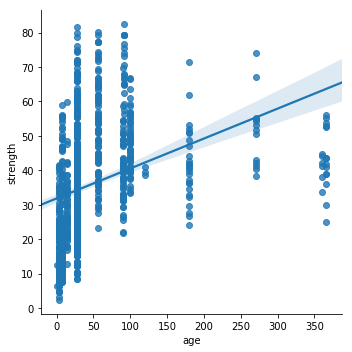

In [31]:
# age vs target variable strength
sns.lmplot(x="age",y="strength",data=df)

Text(0.5, 1.0, 'Heatmap showing correlations between numerical data')

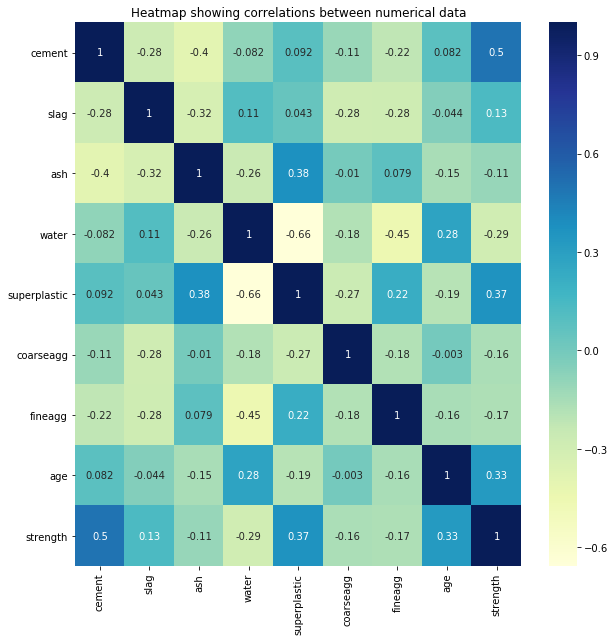

In [32]:
#checking the co relationship with all the varibles
plt.figure(figsize=(10,10))  
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
#adult.corr()
plt.title('Heatmap showing correlations between numerical data')

In [33]:
#Number of outliers present in the dataset
print('Number of outliers in cement: ',concrete_df[((concrete_df.cement - concrete_df.cement.mean()) / concrete_df.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',concrete_df[((concrete_df.slag - concrete_df.slag.mean()) / concrete_df.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in ash: ',concrete_df[((concrete_df.ash - concrete_df.ash.mean()) / concrete_df.ash.std()).abs() >3]['ash'].count())
print('Number of outliers in water: ',concrete_df[((concrete_df.water - concrete_df.water.mean()) / concrete_df.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',concrete_df[((concrete_df.superplastic - concrete_df.superplastic.mean()) / concrete_df.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in coarseagg: ',concrete_df[((concrete_df.coarseagg - concrete_df.coarseagg.mean()) / concrete_df.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Number of outliers in fineagg: ',concrete_df[((concrete_df.fineagg - concrete_df.fineagg.mean()) / concrete_df.fineagg.std()).abs() >3]['fineagg'].count())
print('Number of outliers in age: ',concrete_df[((concrete_df.age - concrete_df.age.mean()) / concrete_df.age.std()).abs() >3]['age'].count())

Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  33


In [34]:

#Records which contains the outliers in slag attribute
print('Records containing outliers in slag: \n',concrete_df[((concrete_df.slag - concrete_df.slag.mean()) / concrete_df.slag.std()).abs() >3]['slag'])

Records containing outliers in slag: 
 21     342.1
564    342.1
918    359.4
990    359.4
Name: slag, dtype: float64


In [35]:
#Records which contains the outliers in water attribute
print('Records containing outliers in water: \n',concrete_df[((concrete_df.water - concrete_df.water.mean()) / concrete_df.water.std()).abs() >3]['water'])


Records containing outliers in water: 
 66     247.0
263    246.9
Name: water, dtype: float64


In [36]:
#Records which contains the outliers in superplastic attribute
print('Records containing outliers in superplastic: \n',concrete_df[((concrete_df.superplastic - concrete_df.superplastic.mean()) / concrete_df.superplastic.std()).abs() >3]['superplastic'])

Records containing outliers in superplastic: 
 44      28.2
156     28.2
232     32.2
292     32.2
538     28.2
744     32.2
816     32.2
838     28.2
955     32.2
1026    28.2
Name: superplastic, dtype: float64


In [37]:
#Records which contains the outliers in age attribute
print('Records containing outliers in age: \n',concrete_df[((concrete_df.age - concrete_df.age.mean()) / concrete_df.age.std()).abs() >3]['age'])

Records containing outliers in age: 
 64      365
133     365
149     270
157     360
159     365
198     365
256     270
262     270
270     270
297     270
313     270
323     360
361     360
393     365
448     360
465     365
484     365
570     270
601     365
623     270
632     270
713     365
720     365
754     365
755     360
850     270
878     270
901     365
919     360
951     270
957     365
995     365
1028    270
Name: age, dtype: int64


In [38]:
#Replacing the outliers by median
for col_name in concrete_df.columns[:-1]:
    q1 = concrete_df[col_name].quantile(0.25)
    q3 = concrete_df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    concrete_df.loc[(concrete_df[col_name] < low) | (concrete_df[col_name] > high), col_name] = concrete_df[col_name].median()

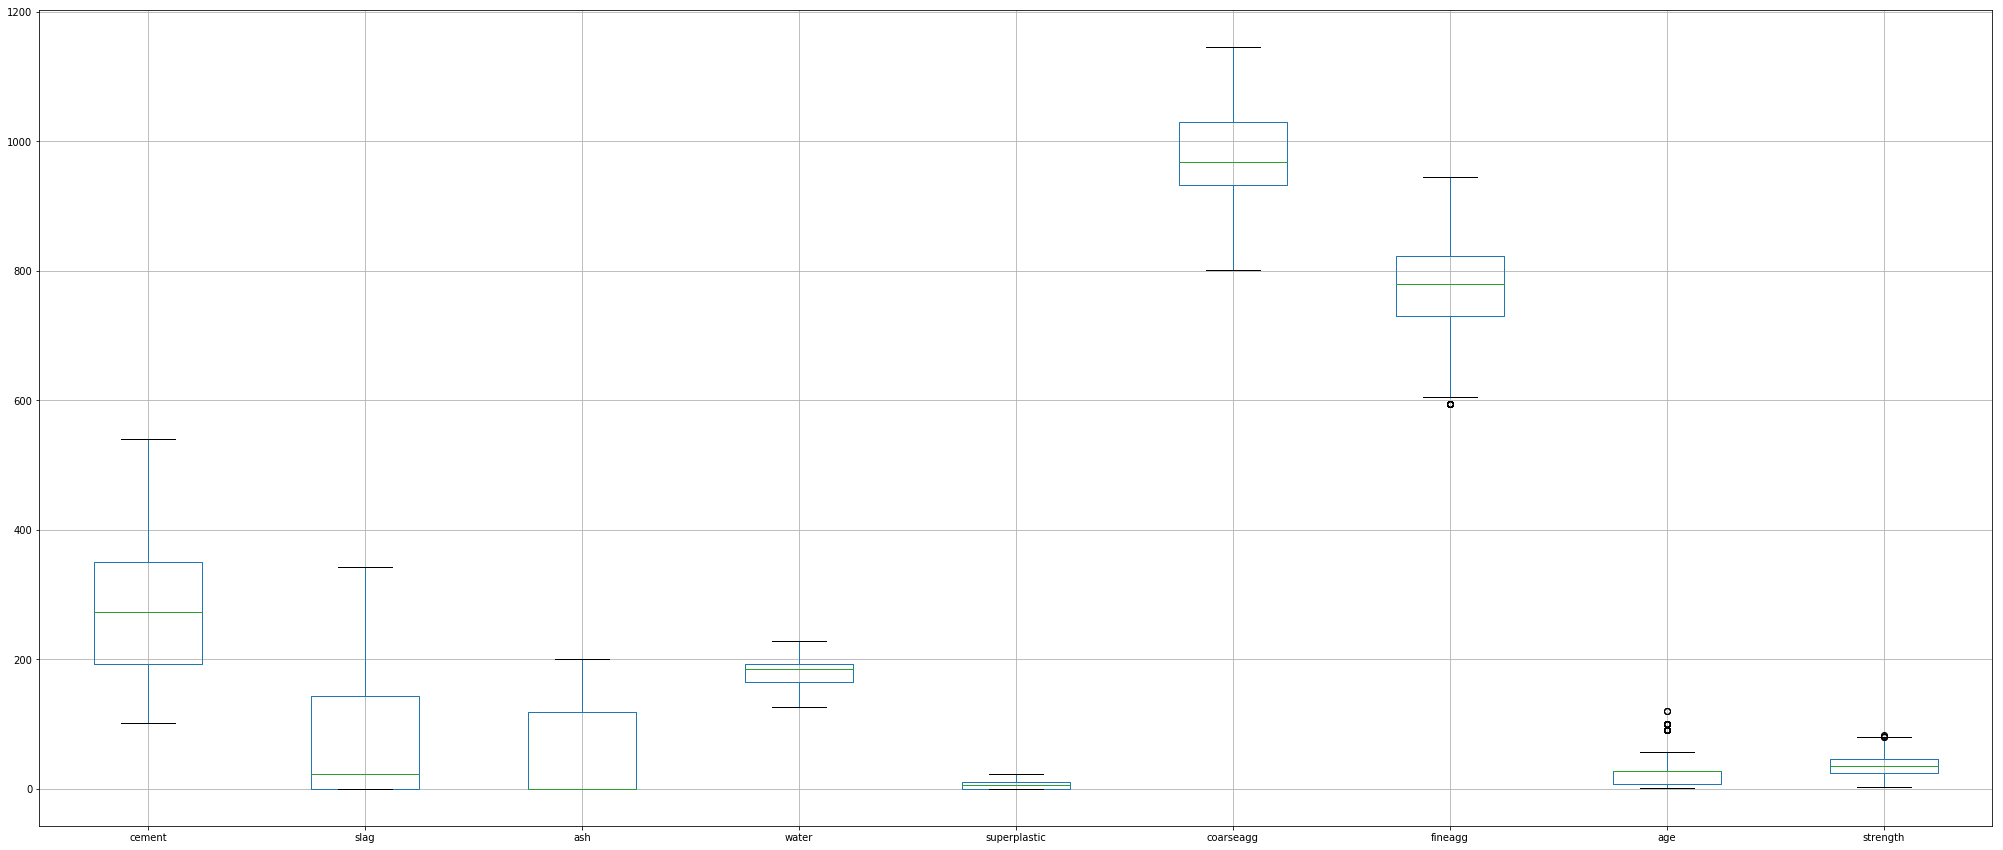

In [39]:

# again check for outliers in dataset using boxplot
concrete_df.boxplot(figsize=(35,15))

In [40]:
#Scaling the dataset
concrete_df_z = concrete_df.apply(zscore)
concrete_df_z=pd.DataFrame(concrete_df_z,columns=concrete_df.columns)

In [41]:
#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]

In [42]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [43]:
y.shape

(1030,)

In [44]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),
                              columns = X_train.columns)

X_train_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,0.664379,-0.854782,-0.887574,1.058162,-1.134345,-0.006660,0.053272,-0.657797
1,0.892753,1.354229,-0.887574,-0.556551,0.778540,-0.629491,-0.179210,2.128844
2,-0.030256,-0.854782,-0.887574,0.469209,-1.134345,-0.084676,1.082287,-1.055889
3,0.949846,0.254394,-0.887574,2.285148,-1.134345,-0.552775,-2.246134,-0.911128
4,0.721473,-0.854782,1.326916,0.567368,0.948996,-2.256133,0.091383,-0.151135


In [45]:
y_train.shape

(721,)

In [46]:
#scaling test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_test)
X_test_scaled = pd.DataFrame(scaler.transform(X_train),
                              columns = X_test.columns)
X_test_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,0.646384,-0.866291,-0.757479,0.988822,-1.005681,0.060400,-0.020467,-0.655056
1,0.879573,1.369479,-0.757479,-0.571538,0.705210,-0.542507,-0.253897,2.079767
2,-0.062901,-0.866291,-0.757479,0.419694,-1.005681,-0.015120,1.012749,-1.045745
3,0.937871,0.256321,-0.757479,2.174506,-1.005681,-0.468245,-2.329258,-0.903677
4,0.704681,-0.866291,1.491432,0.514549,0.857665,-2.117114,0.017800,-0.157816


In [47]:
#We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5, random_state = 1)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [48]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [49]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.353189
slag          0.094829
ash           0.012925
water         0.127600
superplastic  0.017783
coarseagg     0.034537
fineagg       0.030613
age           0.328524


In [50]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9917907393004437
Performance on testing data using DT: 0.8390461676429698
Accuracy DT:  0.8390461676429698
MSE:  0.1680132982422695


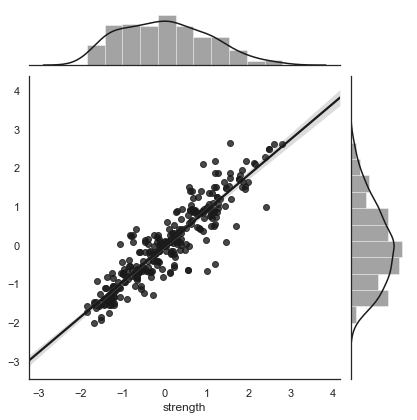

In [51]:
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [52]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839046


In [53]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8567709396426407
Standard Deviation:  0.042248092409094634


In [54]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839046
2,Decision Tree k fold,0.856771


In [55]:
concrete_df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null float64
strength        1030 non-null float64
dtypes: float64(9)
memory usage: 72.5 KB


In [56]:

#Create a copy of the dataset
concrete_df2=concrete_df_z.copy()

In [57]:

#independent and dependent variable
X = concrete_df2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df2['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [58]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [59]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.370586
slag          0.106354
water         0.160198
superplastic  0.033917
age           0.328946


In [60]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.991045963372976
Performance on testing data using DT: 0.8336750698818606
Accuracy DT:  0.8336750698818606


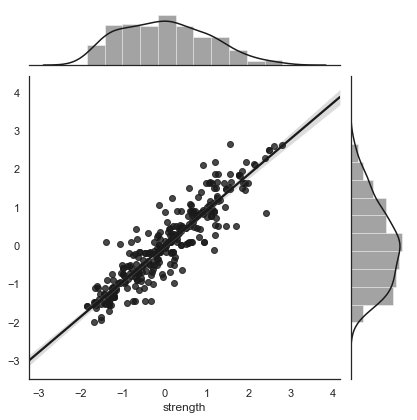

In [61]:
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred,kind="reg", color="k");

In [62]:

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree2'], 'accuracy': [acc_DT]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839046
2,Decision Tree k fold,0.856771
3,Decision Tree2,0.833675


In [63]:
#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [64]:

# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [65]:

print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.416953
slag          0.025822
ash           0.000000
water         0.135128
superplastic  0.017987
coarseagg     0.000000
fineagg       0.007793
age           0.396318


In [66]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  


con2_df=concrete_df_z
xvar = con2_df.drop('strength', axis=1)
feature_cols = xvar.columns

In [67]:

y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7255811799299218
Performance on testing data using DT: 0.6548277186105129
Accuracy DT:  0.6548277186105129
MSE:  0.36031160369896825


In [125]:
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839046
2,Decision Tree k fold,0.856771
3,Decision Tree2,0.833675
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901175
8,Random Forest Regressor k fold,0.910007
9,Gradient Boost Regressor,0.892146
10,Gradient Boost Regressor k fold,0.899429


In [126]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())


Average accuracy:  0.6819101662123233
Standard Deviation:  0.06252311979215476


In [127]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839046
2,Decision Tree k fold,0.856771
3,Decision Tree2,0.833675
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901175
8,Random Forest Regressor k fold,0.910007
9,Gradient Boost Regressor,0.892146
10,Gradient Boost Regressor k fold,0.899429


In [128]:
#Create a copy of the dataset
concrete_df3=concrete_df_z.copy()

In [129]:
#independent and dependent variable
X = concrete_df3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df3['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [130]:

# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [131]:

y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7633076115237021
Performance on testing data using DT: 0.7066524056120851
Accuracy DT:  0.7066524056120851
MSE:  0.30621387600900013


In [132]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree2'], 'accuracy': [acc_RDT]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839046
2,Decision Tree k fold,0.856771
3,Decision Tree2,0.833675
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901175
8,Random Forest Regressor k fold,0.910007
9,Gradient Boost Regressor,0.892146
10,Gradient Boost Regressor k fold,0.899429


In [204]:
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(concrete_df3)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,12074.838835
1,2,9028.665319
2,3,7274.816697
3,4,5971.748236
4,5,5265.603616
5,6,4963.551874
6,7,4258.935698
7,8,4041.715765
8,9,3829.909559
9,10,3699.775515


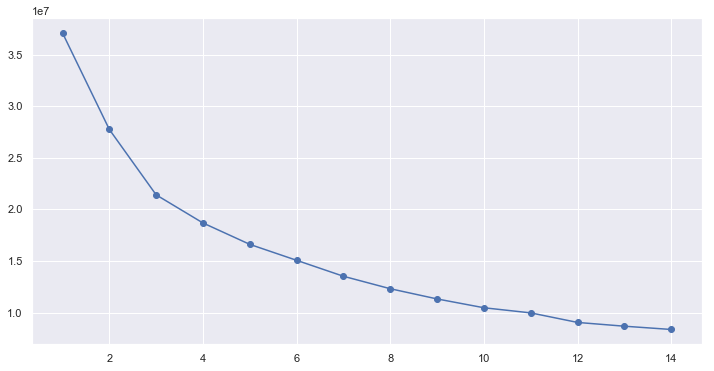

In [134]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [207]:
# k=6
cluster = KMeans( n_clusters = 6, random_state = 235 )
cluster.fit(concrete_df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=235, tol=0.0001, verbose=0)

In [208]:

# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(concrete_df3)
concrete_df3["GROUP"] = prediction     
# Creating a mirror copy for later re-use instead of building repeatedly
concrete_df_z_copy = concrete_df3.copy(deep = True)

In [144]:
centroids = cluster.cluster_centers_
centroids

array([[ 1.00454194e+00,  5.02036231e-01, -5.13681910e-01,
        -1.01583295e+00,  1.02698603e+00, -6.01476304e-01,
         1.59872544e-01,  7.45519636e-02,  1.19352060e+00,
        -8.43769499e-15],
       [ 3.35946095e-01, -8.56735997e-01, -7.96631519e-01,
         4.50946942e-01, -1.02387881e+00,  4.90510549e-01,
         4.13916648e-01, -2.30818840e-01, -6.74387488e-01,
         3.00000000e+00],
       [-6.02402907e-01, -6.57388787e-01,  1.10652155e+00,
        -6.08492176e-01,  4.88919671e-01,  6.23759720e-01,
         4.32804147e-01,  2.70086932e-01, -1.40522923e-01,
         5.00000000e+00],
       [-8.66139681e-01,  1.39500011e+00, -8.38131781e-01,
         5.94848470e-01, -7.42168160e-01, -2.11416626e-02,
        -1.61587882e-01, -1.76865708e-01, -5.72037278e-01,
         2.00000000e+00],
       [ 1.42968733e+00, -4.31164556e-01, -6.96607334e-01,
         1.29402011e+00, -1.00250124e+00,  1.87677245e-01,
        -1.65637577e+00,  1.54928225e-01,  6.99461056e-01,
         1.

In [206]:
centroid_df = pd.DataFrame(centroids, columns = list(concrete_df3) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,GROUP
0,0.874910,1.044160,-0.828905,-1.077020,1.306963,-0.383904,-0.018019,1.473828,2.076194,5.000000e+00
1,-0.108447,-0.778514,-0.648462,0.573879,-0.973042,-0.303341,1.202378,-0.635343,-1.038987,3.066667e+00
2,-0.742741,-0.566632,1.274230,-0.511780,0.478641,0.880564,-0.026573,-0.530520,-0.600473,1.034783e+00
3,1.049062,-0.234532,-0.654854,1.836863,-0.998920,-0.606702,-1.530363,0.316431,0.566690,-4.440892e-16
4,-0.562866,1.906105,-0.847144,0.803270,-0.647290,0.056416,-1.241543,-0.220928,-0.207372,4.000000e+00
5,-0.612393,-0.600702,1.046752,-0.591719,0.401930,0.686403,0.466122,1.679022,0.606165,1.000000e+00
6,0.476413,-0.855970,-0.847144,0.386108,-1.034319,0.801402,0.096005,-0.492214,-0.649227,3.000000e+00
7,-0.408856,-0.830355,0.936310,-0.723323,0.638892,-0.053702,1.192102,-0.484102,-0.541254,1.060606e+00
8,-1.058977,1.116547,-0.828685,0.469679,-0.856342,0.106943,0.338737,-0.578896,-0.991607,4.000000e+00
9,0.435261,1.177031,-0.759514,-0.553764,0.803922,-0.514319,-0.113791,-0.434793,0.797345,4.906667e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002383F55CA58>,
      dtype=object)

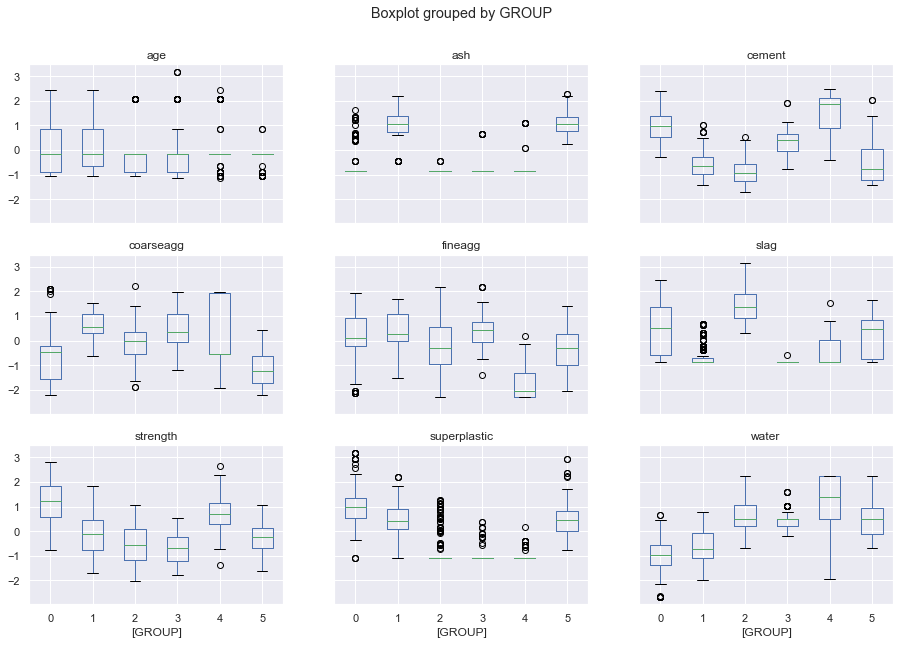

In [209]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.
import matplotlib.pylab as plt
concrete_df3.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

In [210]:
#independent and dependent variables
X=concrete_df3.iloc[:,0:8]
y = concrete_df3.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [211]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [212]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using RFR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9793494947361183
Performance on testing data using RFR: 0.9007338480018958
Accuracy DT:  0.9007338480018958
MSE:  0.10361998441903797


In [213]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839046
2,Decision Tree k fold,0.856771
3,Decision Tree2,0.833675
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901175
8,Random Forest Regressor k fold,0.910007
9,Gradient Boost Regressor,0.892146
10,Gradient Boost Regressor k fold,0.899429


In [214]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9097457121033148
Standard Deviation:  0.024754347094650395


In [215]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839046
2,Decision Tree k fold,0.856771
3,Decision Tree2,0.833675
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901175
8,Random Forest Regressor k fold,0.910007
9,Gradient Boost Regressor,0.892146
10,Gradient Boost Regressor k fold,0.899429


In [216]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [217]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9430469892492805
Performance on testing data using GBR: 0.8917365485048839
Accuracy DT:  0.8917365485048839
MSE:  0.11301190719359668


In [218]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839046
2,Decision Tree k fold,0.856771
3,Decision Tree2,0.833675
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901175
8,Random Forest Regressor k fold,0.910007
9,Gradient Boost Regressor,0.892146
10,Gradient Boost Regressor k fold,0.899429


In [219]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8995021117645609
Standard Deviation:  0.01701684869391365


In [220]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839046
2,Decision Tree k fold,0.856771
3,Decision Tree2,0.833675
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901175
8,Random Forest Regressor k fold,0.910007
9,Gradient Boost Regressor,0.892146
10,Gradient Boost Regressor k fold,0.899429


In [221]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [222]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.8185981320571158
Performance on testing data using GBR: 0.7628586580404134
Accuracy DT:  0.7628586580404134
MSE:  0.2475424065942581


In [223]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'accuracy': [acc_ABR]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839046
2,Decision Tree k fold,0.856771
3,Decision Tree2,0.833675
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901175
8,Random Forest Regressor k fold,0.910007
9,Gradient Boost Regressor,0.892146
10,Gradient Boost Regressor k fold,0.899429


In [224]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7757134068799985
Standard Deviation:  0.03497901361026769


In [225]:
#Store the accuracy results for each model in a dataframe for final model=BaggingRegressor()
model.fit(X_train, y_train)
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor k fold'], 'accuracy': [accuracy]},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839046
2,Decision Tree k fold,0.856771
3,Decision Tree2,0.833675
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901175
8,Random Forest Regressor k fold,0.910007
9,Gradient Boost Regressor,0.892146
10,Gradient Boost Regressor k fold,0.899429


In [226]:
model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [227]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9723129522276885
Performance on testing data using GBR: 0.8903721600288647
Accuracy DT:  0.8903721600288647
MSE:  0.11443613800924599


In [228]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'13'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839046
2,Decision Tree k fold,0.856771
3,Decision Tree2,0.833675
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901175
8,Random Forest Regressor k fold,0.910007
9,Gradient Boost Regressor,0.892146
10,Gradient Boost Regressor k fold,0.899429


In [229]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9004023259271738
Standard Deviation:  0.02911225946423875


In [230]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor k fold'], 'accuracy': [accuracy]},index={'14'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839046
2,Decision Tree k fold,0.856771
3,Decision Tree2,0.833675
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901175
8,Random Forest Regressor k fold,0.910007
9,Gradient Boost Regressor,0.892146
10,Gradient Boost Regressor k fold,0.899429


In [231]:

error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

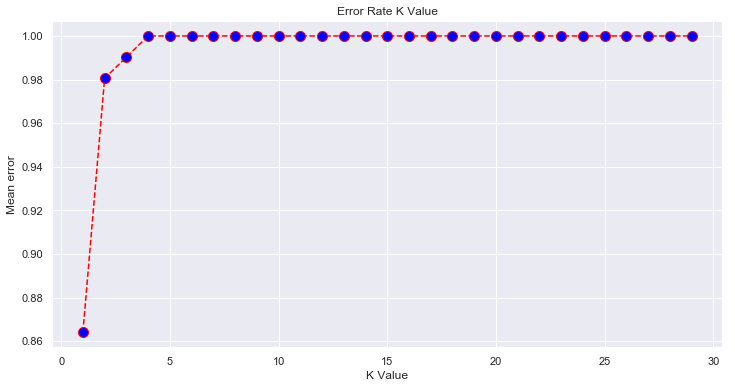

In [232]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [233]:
#k=3
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [172]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using KNNR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using KNNR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_K=metrics.r2_score(y_test, y_pred)
print('Accuracy KNNR: ',acc_K)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using KNNR: 0.8902196318573777
Performance on testing data using KNNR: 0.8078817663272165
Accuracy KNNR:  0.8078817663272165
MSE:  0.20054457616295157


In [190]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor'], 'accuracy': [acc_K]},index={'15'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839046
2,Decision Tree k fold,0.856771
3,Decision Tree2,0.833675
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901175
8,Random Forest Regressor k fold,0.910007
9,Gradient Boost Regressor,0.892146
10,Gradient Boost Regressor k fold,0.899429


In [191]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6971192327136142
Standard Deviation:  0.036742110058929286


In [192]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor k fold'], 'accuracy': [accuracy]},index={'16'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839046
2,Decision Tree k fold,0.856771
3,Decision Tree2,0.833675
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901175
8,Random Forest Regressor k fold,0.910007
9,Gradient Boost Regressor,0.892146
10,Gradient Boost Regressor k fold,0.899429


In [193]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [234]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using SVR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_S=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR: 0.8902196318573777
Performance on testing data using SVR: 0.8078817663272165
Accuracy SVR:  0.8078817663272165
MSE:  0.20054457616295157


In [235]:

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Support Vector Regressor'], 'accuracy': [acc_S]},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839046
2,Decision Tree k fold,0.856771
3,Decision Tree2,0.833675
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901175
8,Random Forest Regressor k fold,0.910007
9,Gradient Boost Regressor,0.892146
10,Gradient Boost Regressor k fold,0.899429


In [236]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7947547097467347
Standard Deviation:  0.03961462765692188


In [237]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVR k fold'], 'accuracy': [accuracy]},index={'18'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839046
2,Decision Tree k fold,0.856771
3,Decision Tree2,0.833675
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901175
8,Random Forest Regressor k fold,0.910007
9,Gradient Boost Regressor,0.892146
10,Gradient Boost Regressor k fold,0.899429


In [238]:
#Multiple model Ensemble
from sklearn import svm
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear')

In [239]:
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)


VotingRegressor(estimators=[('LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('KN',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=3,
                                                 p=2, weights='uniform')),
                            ('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='linear',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False))],
                n_jobs=None, weights=None)

In [240]:
y_pred = evc.predict(X_test)
# performance on train data
print('Performance on training data using ensemble:',evc.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ensemble:',evc.score(X_test,y_test))
#Evaluate the model using accuracy
acc_E=metrics.r2_score(y_test, y_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ensemble: 0.8213604308836657
Performance on testing data using ensemble: 0.7849191766894734
Accuracy ensemble:  0.7849191766894734
MSE:  0.22451430937603256


In [241]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': [acc_E]},index={'19'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839046
2,Decision Tree k fold,0.856771
3,Decision Tree2,0.833675
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901175
8,Random Forest Regressor k fold,0.910007
9,Gradient Boost Regressor,0.892146
10,Gradient Boost Regressor k fold,0.899429


In [242]:

num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(evc,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble k fold'], 'accuracy': [accuracy]},index={'20'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Average accuracy:  0.7803291490734494
Standard Deviation:  0.029918532582796722


,Method,accuracy
1,Decision Tree,0.839046
2,Decision Tree k fold,0.856771
3,Decision Tree2,0.833675
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901175
8,Random Forest Regressor k fold,0.910007
9,Gradient Boost Regressor,0.892146
10,Gradient Boost Regressor k fold,0.899429


In [243]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble k fold'], 'accuracy': [accuracy]},index={'20'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
resultsconcrete_XY = X.join(y)

,R Square Score
Ridge,0.703769
Lasso,0.703649
Linear,0.703643


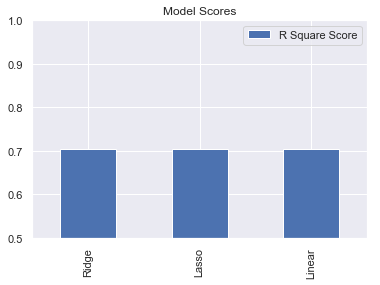

In [244]:
# R2 Score

def lets_try(X_train, y_train):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, X_train, y_train, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    results=results.sort_values(by=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    

    return results

lets_try(X_train, y_train)

In [245]:
concrete_XY = X.join(y)

In [246]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

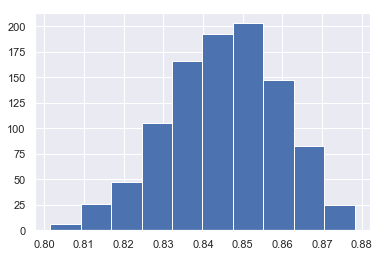

95.0 confidence interval 81.5% and 87.0%


In [247]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [248]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

KeyboardInterrupt: 

In [ ]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [ ]:

X_test_scaled.head()

In [249]:

#covarience matrix of scaled data
covMatrix = np.cov(X_test_scaled,rowvar=False)
print(covMatrix)

[[ 1.0440716  -0.27078538 -0.4478679  -0.04861884 -0.01597432 -0.09905333
  -0.28210049 -0.02961105]
 [-0.27078538  1.0257962  -0.34272576  0.0555706   0.05450028 -0.28648125
  -0.25999788 -0.02536521]
 [-0.4478679  -0.34272576  1.03276185 -0.22272201  0.39590516  0.00694502
   0.11205248  0.01944603]
 [-0.04861884  0.0555706  -0.22272201  0.93510757 -0.5571443  -0.1535186
  -0.42364234 -0.02225407]
 [-0.01597432  0.05450028  0.39590516 -0.5571443   0.80106784 -0.17332291
   0.14467833  0.05276211]
 [-0.09905333 -0.28648125  0.00694502 -0.1535186  -0.17332291  0.93834707
  -0.15187187  0.00177611]
 [-0.28210049 -0.25999788  0.11205248 -0.42364234  0.14467833 -0.15187187
   1.00958074  0.07665866]
 [-0.02961105 -0.02536521  0.01944603 -0.02225407  0.05276211  0.00177611
   0.07665866  0.96449326]]


In [250]:
#lets intialize and fit pca
pca = PCA(n_components=8)
pca.fit(X_test_scaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [251]:
print(pca.explained_variance_) #explained variance of each attributes

[2.05632652 1.38958149 1.26535769 1.00103145 0.92713814 0.90376312
 0.16592212 0.0421056 ]


In [252]:
print(pca.components_) #principle components

[[ 0.27910703  0.22148382 -0.51342919  0.48117731 -0.42009317 -0.02593718
  -0.44031301 -0.08292459]
 [ 0.50608771 -0.72323449 -0.02825078 -0.09758263 -0.13878425  0.43716786
  -0.00903478 -0.00531004]
 [ 0.60338179  0.17431684 -0.36123591 -0.40272254  0.3663505  -0.40425587
   0.12085573  0.02501233]
 [-0.10628962 -0.11970053 -0.30880153  0.13680314 -0.3115472  -0.14372344
   0.56519138  0.65049323]
 [ 0.07652947  0.15679679  0.14750272 -0.07564411  0.24568471  0.23984348
  -0.51642814  0.7466559 ]
 [ 0.19875649 -0.3431349   0.44258956  0.43737783  0.0747965  -0.64940893
  -0.13633978  0.09825685]
 [ 0.19127503  0.21902321  0.39690826 -0.47193048 -0.70791188 -0.16442354
  -0.07054071  0.04514223]
 [-0.4567936  -0.43916313 -0.36682946 -0.39787651 -0.07675668 -0.3432788
  -0.42630138  0.01187423]]


In [253]:

print(pca.explained_variance_ratio_) #explained variance of each attribute in percentage

[0.26529048 0.17927247 0.16324613 0.12914492 0.1196118  0.11659615
 0.02140592 0.00543212]


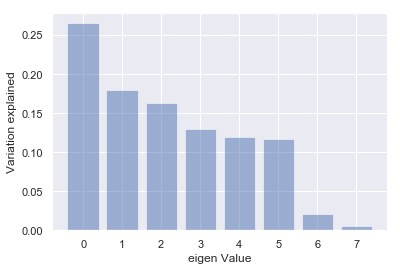

In [254]:
#lets visualize the contribution of variance of each attribute
plt.bar(list(range(8)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

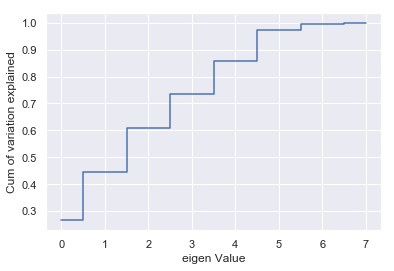

In [255]:
#we can see 5 attributes explaines 95% of variance overall.
plt.step(list(range(8)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [256]:
#lets fit pca with 5 attributes
pca3 = PCA(n_components=6)
pca3.fit(X_test_scaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(X_test_scaled)

[[ 0.27910703  0.22148382 -0.51342919  0.48117731 -0.42009317 -0.02593718
  -0.44031301 -0.08292459]
 [ 0.50608771 -0.72323449 -0.02825078 -0.09758263 -0.13878425  0.43716786
  -0.00903478 -0.00531004]
 [ 0.60338179  0.17431684 -0.36123591 -0.40272254  0.3663505  -0.40425587
   0.12085573  0.02501233]
 [-0.10628962 -0.11970053 -0.30880153  0.13680314 -0.3115472  -0.14372344
   0.56519138  0.65049323]
 [ 0.07652947  0.15679679  0.14750272 -0.07564411  0.24568471  0.23984348
  -0.51642814  0.7466559 ]
 [ 0.19875649 -0.3431349   0.44258956  0.43737783  0.0747965  -0.64940893
  -0.13633978  0.09825685]]
[0.26529048 0.17927247 0.16324613 0.12914492 0.1196118  0.11659615]


In [257]:
Xpca3.shape

(721, 6)

In [258]:
y.shape

(1030,)

In [259]:
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(Xpca3, y_train, test_size = 0.3)


In [261]:
# you  can  mark down this cell  since it takes more time(20min) ,after this we will find out specific parameters
#tuning for number of trees
param_grid = {'n_estimators':range(20,1001,10),
              'max_depth':[10], #range(5,16,2), 
              'min_samples_split':[100], #range(200,1001,200), 
              'learning_rate':[0.2]}
clf1 = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(pca_X_train,pca_y_train.values.ravel())
print(clf1.best_estimator_) 
print("R Squared:",clf1.best_score_)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=100,
                          min_weight_fraction_leaf=0.0, n_estimators=60,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
R Squared: 0.7829738092933441


In [262]:
#Let apply params to fit this model
clfgp = GradientBoostingRegressor(random_state=1, max_depth=20, 
                                min_samples_split=50, n_estimators=230, 
                                learning_rate=0.2).fit(pca_X_train,pca_y_train.values.ravel())
print("R Squared:",cross_val_score(clfgp, pca_X_train, pca_y_train.values.ravel(), cv=cv, scoring='r2').mean())

R Squared: 0.7860496580301146


In [264]:
# you can  just mark down this  cell since it takes more time,after this we will find out specific parameters
#tuning for number of trees
param_grid={
     'bootstrap':[False],
     'max_depth':[80,90,100,110],
     'max_features':[2,3,4,5],
     'min_samples_leaf':[3,4,5],
     'n_estimators':[100,200,300,1000]
}


clf2 = GridSearchCV(RandomForestRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(pca_X_train, pca_y_train.values.ravel())
print(clf2.best_estimator_) 
print("R Squared:",clf2.best_score_)
print("BEST PARAMS:",clf2.best_params_)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)
R Squared: 0.7751017168978425
BEST PARAMS: {'bootstrap': False, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 4, 'n_estimators': 200}


In [265]:
clfrp = RandomForestRegressor(random_state=1, bootstrap=False, 
                                max_depth=80, max_features=3, 
                                min_samples_leaf=3,n_estimators=1000).fit(pca_X_train, pca_y_train.values.ravel())
print("R Squared:",cross_val_score(clfrp, pca_X_train, pca_y_train.values.ravel(), cv=cv, scoring='r2').mean())

R Squared: 0.7743372120813914


In [266]:

print("Test RMSE: ", np.sqrt(mean_squared_error(pca_y_test, clfrp.predict(pca_X_test))))
print("Test R^2: ", r2_score(pca_y_test, clfrp.predict(pca_X_test)))

Test RMSE:  0.4195293561916056
Test R^2:  0.8227648400594383


In [267]:
test_score = clfrp.score(pca_X_test, pca_y_test)
test_score

0.8227648400594383